In [26]:
from model import run_model
from sklearn.model_selection import train_test_split
from pathlib import Path

In [27]:
TARGET = 'is_fit'

# Find all CSV files in subfolders of data/
data_dir = Path('data')
csv_files = [f for f in data_dir.rglob('*.csv') if f.parent != data_dir]

# Dictionary to store results
results = {}

# Iterate over each CSV file
for csv_file in csv_files:
    filename = str(csv_file)
    
    try:
        ROC_AUCs = run_model(filename, TARGET)
        results[filename] = ROC_AUCs
    except Exception as e:
        print(f"Error processing {filename}: {e}")
        results[filename] = None

for filename, roc_aucs in results.items():
    print(f"{filename}: {roc_aucs}")

is_fit
Cross-validation scores: [0.74857143 0.74571429 0.74285714 0.74498567 0.75931232]
Mean cross-validation score: 0.7482881702824395
For Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       225
           1       0.75      0.77      0.76       213

    accuracy                           0.76       438
   macro avg       0.76      0.76      0.76       438
weighted avg       0.76      0.76      0.76       438

ROC AUC: 0.7628794992175273
--------------------------------
Random Forest Classifier Cross-validation scores: [0.85142857 0.85142857 0.82285714 0.85386819 0.84813754]
Mean cross-validation score: 0.8455440032746623
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       225
           1       0.75      0.77      0.76       213

    accuracy                           0.76       438
   macro avg       0.76      0.

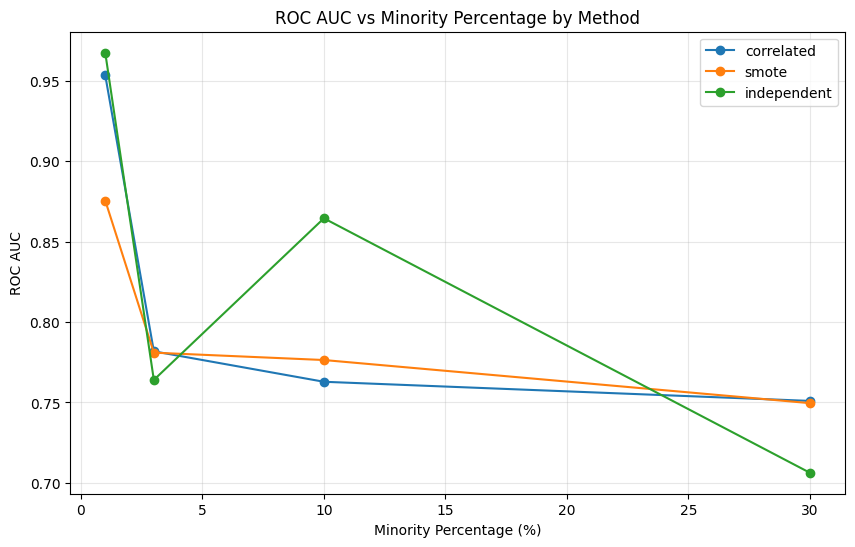

In [28]:
import re
import matplotlib.pyplot as plt

# Parse results and organize by method
data_by_method = {}

for filename, roc_aucs in results.items():
    # Extract method and percentage using regex
    # Pattern: data/fitness/{method}/minority_{percentage}pct...
    match = re.search(r'data/fitness/([^/]+)/minority_(\d+)pct', filename)
    
    if match and roc_aucs:
        method = match.group(1)
        percentage = int(match.group(2))
        roc_auc = roc_aucs[0]  # Take first index as requested
        
        if method not in data_by_method:
            data_by_method[method] = {'percentages': [], 'roc_aucs': []}
        
        data_by_method[method]['percentages'].append(percentage)
        data_by_method[method]['roc_aucs'].append(roc_auc)

# Sort each method's data by percentage
for method in data_by_method:
    # Zip, sort, and unzip to keep percentages and roc_aucs aligned
    sorted_pairs = sorted(zip(data_by_method[method]['percentages'], 
                             data_by_method[method]['roc_aucs']))
    data_by_method[method]['percentages'], data_by_method[method]['roc_aucs'] = zip(*sorted_pairs)

# Plot each method with different color
plt.figure(figsize=(10, 6))

for method, data in data_by_method.items():
    plt.plot(data['percentages'], data['roc_aucs'], marker='o', label=method)

plt.xlabel('Minority Percentage (%)')
plt.ylabel('ROC AUC')
plt.title('ROC AUC vs Minority Percentage by Method')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()